In [34]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("C:\\Users\\myacoubalex\\Downloads\\archive (10)\\shopping_trends.csv")

In [3]:
data.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer ID               3900 non-null   int64  
 1   Age                       3900 non-null   int64  
 2   Gender                    3900 non-null   object 
 3   Item Purchased            3900 non-null   object 
 4   Category                  3900 non-null   object 
 5   Purchase Amount (USD)     3900 non-null   int64  
 6   Location                  3900 non-null   object 
 7   Size                      3900 non-null   object 
 8   Color                     3900 non-null   object 
 9   Season                    3900 non-null   object 
 10  Review Rating             3900 non-null   float64
 11  Subscription Status       3900 non-null   object 
 12  Payment Method            3900 non-null   object 
 13  Shipping Type             3900 non-null   object 
 14  Discount

In [5]:
data.describe()
# Age
#  - The average age is 44
#  - The minimum age is 18
#  - The maximum age is 70
# Purchase amount
#  - The average purchase amount is 59.76 
#  - standard deviation of purchae amount 23.68
# Rating
#  - The average rating is 3.7

,Customer ID,Age,Purchase Amount (USD),Review Rating,Previous Purchases
count,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000
mean,1950.500000,44.068462,59.764359,3.749949,25.351538
std,1125.977353,15.207589,23.685392,0.716223,14.447125
min,1.000000,18.000000,20.000000,2.500000,1.000000
25%,975.750000,31.000000,39.000000,3.100000,13.000000
50%,1950.500000,44.000000,60.000000,3.700000,25.000000
75%,2925.250000,57.000000,81.000000,4.400000,38.000000
max,3900.000000,70.000000,100.000000,5.000000,50.000000


In [6]:
data.shape    #we have in our dataset 3900 customers and 19 features about each one of them

(3900, 19)

In [7]:
data.isna().sum().sum()  # there is no nulls or missing values

0

In [8]:
data.duplicated().sum().sum() # there is no duplicates

0

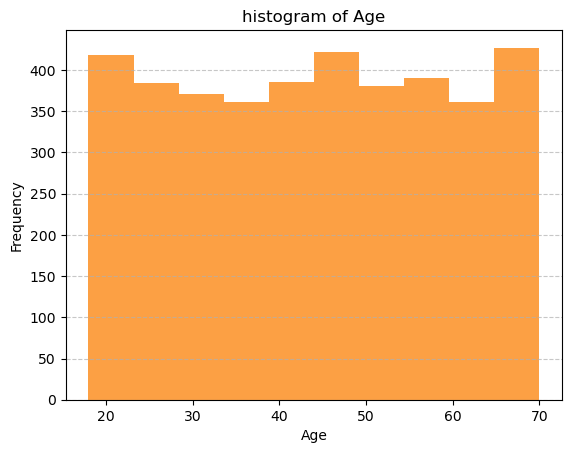

In [9]:
data["Age"].plot(kind ="hist",color="#fca044")
plt.title("histogram of Age")
plt.xlabel("Age")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

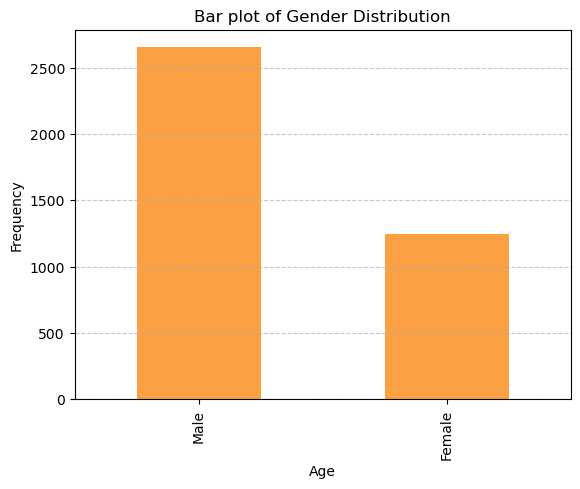

In [10]:
data["Gender"].value_counts().plot(kind ="bar",color="#fca044")
plt.title("Bar plot of Gender Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
# the majority purchases by males

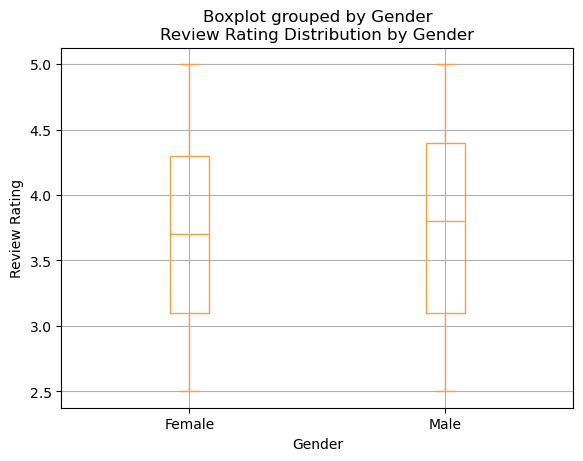

In [11]:
data.boxplot(column = "Review Rating" , by = "Gender" , color="#fca044")
plt.xlabel("Gender")
plt.ylabel("Review Rating")
plt.title("Review Rating Distribution by Gender")
plt.show()

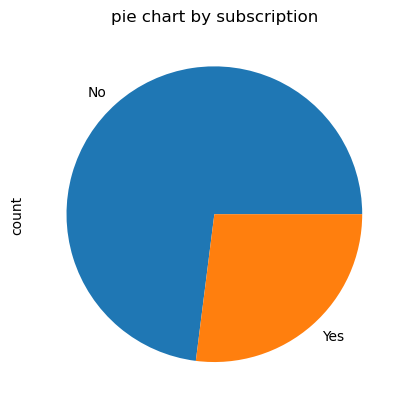

In [12]:
data["Subscription Status"].value_counts().plot(kind = "pie")
plt.title("pie chart by subscription")
plt.show()
# the majority have no subscription

In [13]:
#Understanding typical purchase behavior in descending order (using mean)
data.groupby("Category")["Purchase Amount (USD)"].mean().sort_values(ascending = False)

Category
Footwear       60.255426
Clothing       60.025331
Accessories    59.838710
Outerwear      57.172840
Name: Purchase Amount (USD), dtype: float64

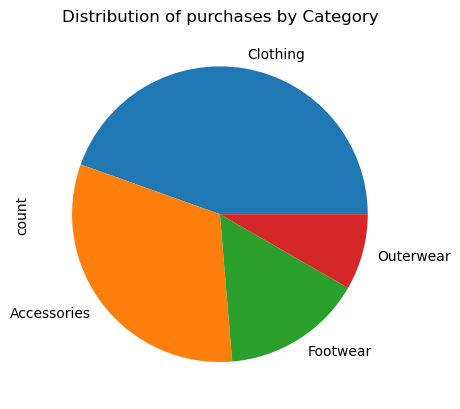

In [14]:
data["Category"].value_counts().plot(kind="pie")
plt.title("Distribution of purchases by Category")
plt.show()

In [15]:
#Identifying categories with the highest/lowest total revenue in descending order (using sum for frequency)
data.groupby("Category")["Purchase Amount (USD)"].sum().sort_values(ascending = False)

Category
Clothing       104264
Accessories     74200
Footwear        36093
Outerwear       18524
Name: Purchase Amount (USD), dtype: int64

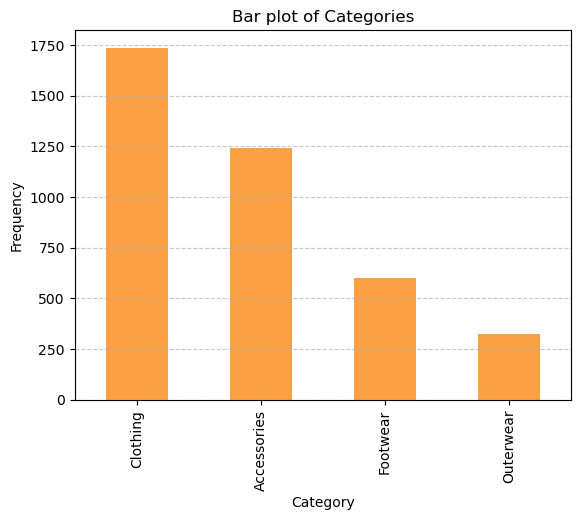

In [16]:
data["Category"].value_counts().plot(kind ="bar",color="#fca044")
plt.title("Bar plot of Categories")
plt.xlabel("Category")
plt.ylabel("Frequency")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [17]:
#return the ascending order of lacations by its avrage rating
data.groupby("Location")["Review Rating"].mean().sort_values()
#West Virginia has the worst avr Review_Rating with 3.580247
#Texas has the worst avr  Review_Rating with 3.905195

Location
West Virginia     3.580247
Oklahoma          3.605333
New Hampshire     3.611268
Georgia           3.624051
Illinois          3.644565
Hawaii            3.673846
Utah              3.676056
South Dakota      3.677143
Florida           3.679412
Arizona           3.693846
Wyoming           3.694366
Connecticut       3.694872
Virginia          3.709091
Nevada            3.712644
Vermont           3.712941
Massachusetts     3.715278
Arkansas          3.724051
Colorado          3.726667
Nebraska          3.728736
New Mexico        3.732099
Rhode Island      3.736508
Missouri          3.746914
New York          3.747126
North Dakota      3.751807
Kentucky          3.751899
Minnesota         3.753409
Mississippi       3.756250
South Carolina    3.761842
Oregon            3.764865
New Jersey        3.767164
Louisiana         3.772619
Pennsylvania      3.779730
Idaho             3.781720
Tennessee         3.781818
Alabama           3.782022
Delaware          3.795349
Alaska            3

In [18]:
# modify the data to make it order descinding by its rating
data.sort_values("Review Rating", ascending = False , inplace = True)
data

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
776,777,49,Male,Shirt,Clothing,60,Alabama,M,Maroon,Spring,5.0,Yes,PayPal,Standard,Yes,Yes,8,Venmo,Every 3 Months
1664,1665,19,Male,Handbag,Accessories,53,Minnesota,M,Purple,Spring,5.0,No,PayPal,Next Day Air,Yes,Yes,35,PayPal,Weekly
1277,1278,19,Male,Blouse,Clothing,97,Rhode Island,L,Green,Spring,5.0,No,Debit Card,Express,Yes,Yes,5,Venmo,Quarterly
2632,2633,24,Male,Scarf,Accessories,27,Alaska,M,Black,Fall,5.0,No,Venmo,Next Day Air,No,No,14,Cash,Annually
965,966,43,Male,Boots,Footwear,55,Delaware,L,Black,Spring,5.0,Yes,Debit Card,Store Pickup,Yes,Yes,10,Credit Card,Annually
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1451,1452,54,Male,Jacket,Outerwear,34,Utah,M,Maroon,Fall,2.5,No,Venmo,Next Day Air,Yes,Yes,35,PayPal,Quarterly
3473,3474,63,Female,Dress,Clothing,40,Kansas,M,Cyan,Spring,2.5,No,Credit Card,Express,No,No,11,Cash,Weekly
1449,1450,18,Male,Socks,Clothing,41,New York,L,Lavender,Winter,2.5,No,Debit Card,Store Pickup,Yes,Yes,20,Cash,Every 3 Months
133,134,52,Male,Sweater,Clothing,65,Montana,M,Violet,Winter,2.5,Yes,Bank Transfer,Next Day Air,Yes,Yes,25,Venmo,Annually


In [19]:
data["Color"].value_counts().head()

Color
Olive     177
Yellow    174
Silver    173
Teal      172
Green     169
Name: count, dtype: int64

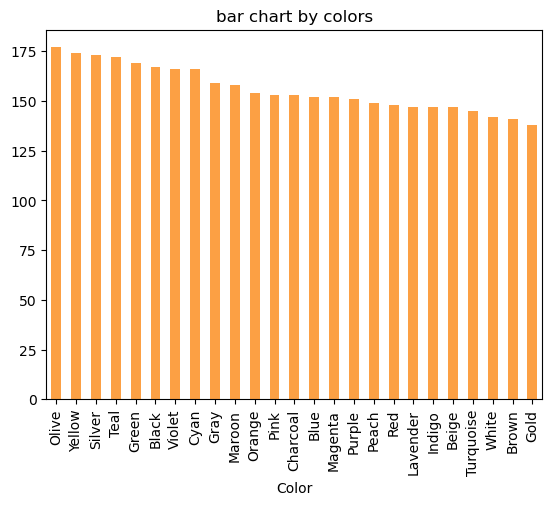

In [20]:
data["Color"].value_counts().plot(kind="bar", color="#fca044")
plt.title("bar chart by colors")
plt.show()

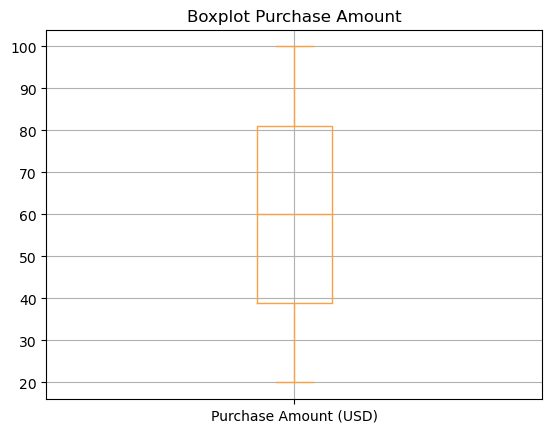

In [37]:
data.boxplot(column = "Purchase Amount (USD)" , color="#fca044")
plt.title("Boxplot Purchase Amount")
plt.show()
#the min is 20 of Purchase Amount (USD)
#the max is 100 of Purchase Amount (USD)
#the median is 60 of Purchase Amount (USD)
#50% data between 40:80 approximately

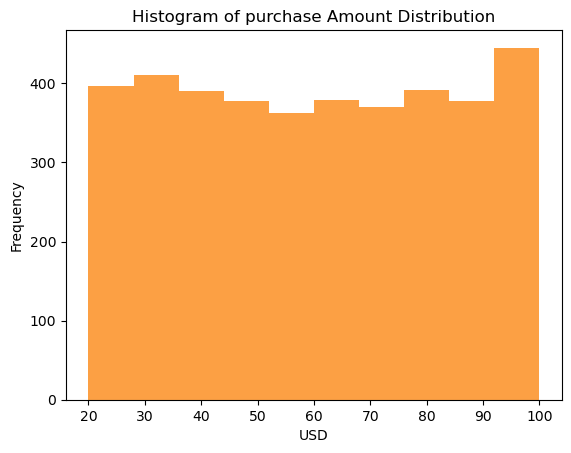

In [22]:
data["Purchase Amount (USD)"].plot(kind="hist",bins=10,color="#fca044")
plt.xlabel("USD")
plt.ylabel("Frequency")
plt.title("Histogram of purchase Amount Distribution")
plt.show()

In [23]:
#the season with highest purchase amount (fall) 
data.groupby("Season")["Purchase Amount (USD)"].sum().sort_values(ascending= False)

Season
Fall      60018
Spring    58679
Winter    58607
Summer    55777
Name: Purchase Amount (USD), dtype: int64

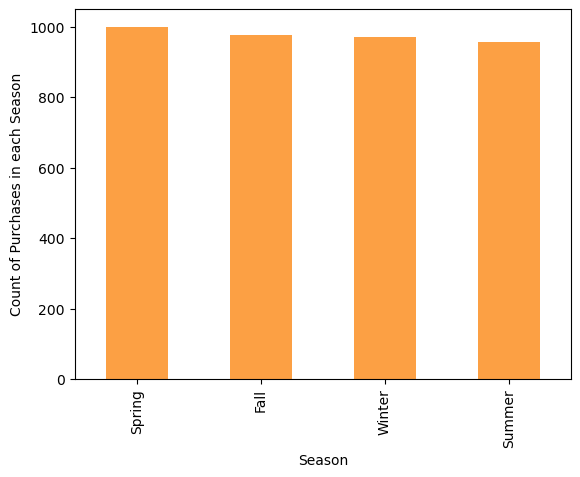

In [24]:
#frequency of each Season in our data
data["Season"].value_counts().plot(kind="bar" ,color="#fca044")
plt.xlabel("Season")
plt.ylabel("Count of Purchases in each Season")
plt.show()

In [25]:
# the highest paymnet meethod (Credit Card)
data.groupby("Payment Method")["Purchase Amount (USD)"].sum().sort_values(ascending= False)

Payment Method
Credit Card      42567
Venmo            39991
Cash             38833
PayPal           37449
Bank Transfer    37123
Debit Card       37118
Name: Purchase Amount (USD), dtype: int64

In [26]:
# most prefered Payment Method  (PayPal)
data["Preferred Payment Method"].value_counts().sort_values(ascending= False).head(1)

Preferred Payment Method
PayPal    677
Name: count, dtype: int64

In [27]:
#what are the items that be purchased 
data["Item Purchased"].unique()

array(['Shirt', 'Handbag', 'Blouse', 'Scarf', 'Boots', 'Dress', 'Belt',
       'Hoodie', 'Sandals', 'Jeans', 'Backpack', 'Jacket', 'Jewelry',
       'Shorts', 'Hat', 'Pants', 'Socks', 'Skirt', 'Gloves', 'Coat',
       'Sneakers', 'Sunglasses', 'T-shirt', 'Sweater', 'Shoes'],
      dtype=object)

In [28]:
# avr purchase amounts across different locations for each item purchased.

#So we will restructure our dataframe by creating a pivot table
pd.pivot_table(
    data,  # The DataFrame containing your purchase data
    index="Location",  # Group data by the "Location" column (rows)
    values="Purchase Amount (USD)",  # Calculate statistics for "Purchase Amount (USD)" (values)
    columns="Item Purchased",  # Group data by the "Item Purchased" column (columns)
    aggfunc="mean"  # Aggregate data using the mean function (average purchase amount)
).head() 
# print 5 only for simple output

Item Purchased,Backpack,Belt,Blouse,Boots,Coat,Dress,Gloves,Handbag,Hat,Hoodie,...,Scarf,Shirt,Shoes,Shorts,Skirt,Sneakers,Socks,Sunglasses,Sweater,T-shirt
Location,,,,,,,,,,,,,,,,,,,,,
Alabama,74.0,26.500000,52.0,73.666667,54.500000,55.200000,85.000000,57.666667,76.000000,53.000000,...,75.333333,48.2,54.333333,49.000000,68.666667,79.500000,93.50,62.666667,40.500000,52.50
Alaska,74.6,76.750000,67.5,56.000000,45.500000,74.500000,66.333333,46.000000,52.666667,56.500000,...,45.000000,59.5,80.000000,76.666667,87.333333,73.333333,74.25,83.000000,50.333333,56.75
Arizona,48.6,84.500000,61.0,NaN,65.333333,71.000000,87.000000,58.666667,87.000000,66.666667,...,53.500000,80.0,87.000000,46.000000,68.500000,78.500000,61.00,66.000000,70.400000,62.00
Arkansas,90.0,55.000000,66.0,50.000000,54.250000,62.800000,64.333333,50.000000,35.000000,55.250000,...,67.500000,59.0,59.500000,95.000000,44.500000,69.000000,60.50,56.000000,71.500000,52.00
California,57.4,61.666667,39.5,62.500000,55.000000,58.428571,53.000000,65.250000,49.000000,56.000000,...,54.500000,42.8,NaN,63.333333,56.000000,73.000000,83.00,69.400000,42.000000,69.00


In [30]:
# the size with higheast avrage Purchase amount  (Small)
data.groupby("Size")["Purchase Amount (USD)"].mean().sort_values()

Size
L     58.563153
M     59.924217
XL    60.090909
S     61.037707
Name: Purchase Amount (USD), dtype: float64

In [33]:
 #the size with higheast Purchase amount  (medium)
data.groupby("Size")["Purchase Amount (USD)"].sum().sort_values()

Size
XL     25779
S      40468
L      61667
M     105167
Name: Purchase Amount (USD), dtype: int64

In [31]:
# each color with its highest categories 
data.groupby("Color")["Category"].value_counts()

Color   Category   
Beige   Clothing       65
        Accessories    44
        Footwear       24
        Outerwear      14
Black   Clothing       81
                       ..
White   Outerwear      15
Yellow  Clothing       75
        Accessories    56
        Footwear       30
        Outerwear      13
Name: count, Length: 100, dtype: int64

# Thanks